In [1]:
import re
import requests
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import time
from IPython.display import HTML

In [3]:
driver = webdriver.Remote('http://13.250.162.91:4441/wd/hub', webdriver.DesiredCapabilities.FIREFOX)

In [4]:
link = "http://ib.bri.co.id"

In [5]:
driver.get(link)


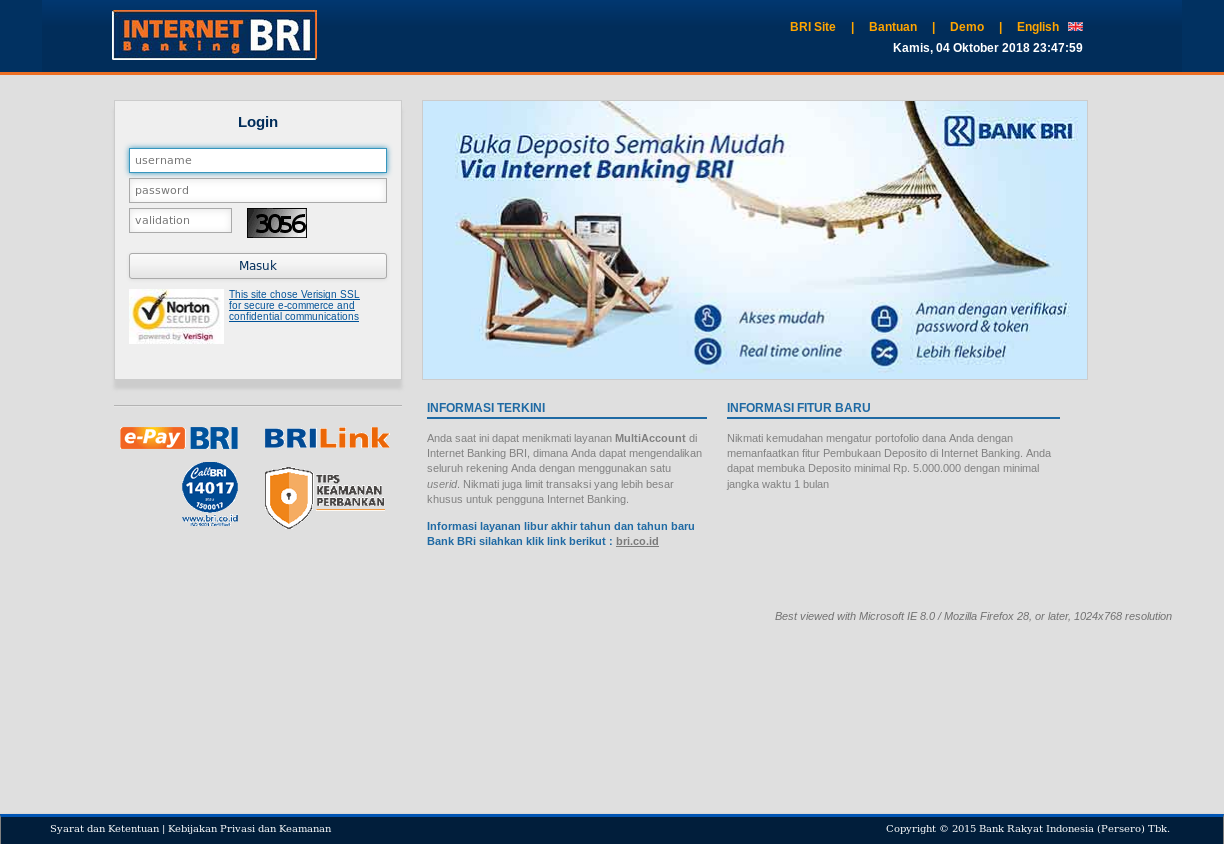

In [6]:
time.sleep(10)
image = driver.get_screenshot_as_base64()
HTML("""<img src="data:image/png;base64,{0}">""".format(image))

In [7]:
gambar = driver.find_element_by_xpath('.//img[@class="alignimg"]')

In [8]:
def get_captcha(driver, element, path):
    location = element.location
    size = element.size
    driver.save_screenshot(path)
    image = Image.open(path)

    left = location['x']
    top = location['y'] 
    right = location['x'] + size['width']
    bottom = location['y'] + size['height']

    image = image.crop((left, top, right, bottom)) 
    image.save(path, 'png')  

In [9]:
get_captcha(driver, gambar, "gambarCaptcha.png")

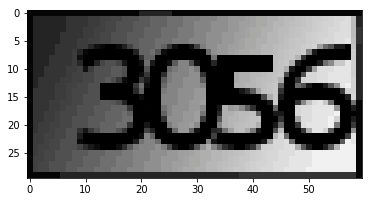

In [10]:
dataGambar = Image.open("gambarCaptcha.png")
plt.imshow(dataGambar)